# Determining Red Vine Quality using Machine Learning


![download.jfif](attachment:download.jfif)

In this project we will be using Machine Learning to determine the quality of Red Wine with the help of factors like the chemical composition of the vine the contenct of sulpher, alchohol and the quality of the wine.

### Time Line for the Project:
- Importing libraries
- Data Analysis
- Data Preprocessing
- Prediction using KNN
- Classification using SVM

#### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd  ##  data analysis
import matplotlib.pyplot as plt
import seaborn as sns  ## visualisation
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler     ## preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score    ### evaluation

In [ ]:
df= pd.read_csv('/content/wine.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


### Data Analysis

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()  ## checking null values

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.shape

(1599, 12)

Plotting Histograms

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
cols= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

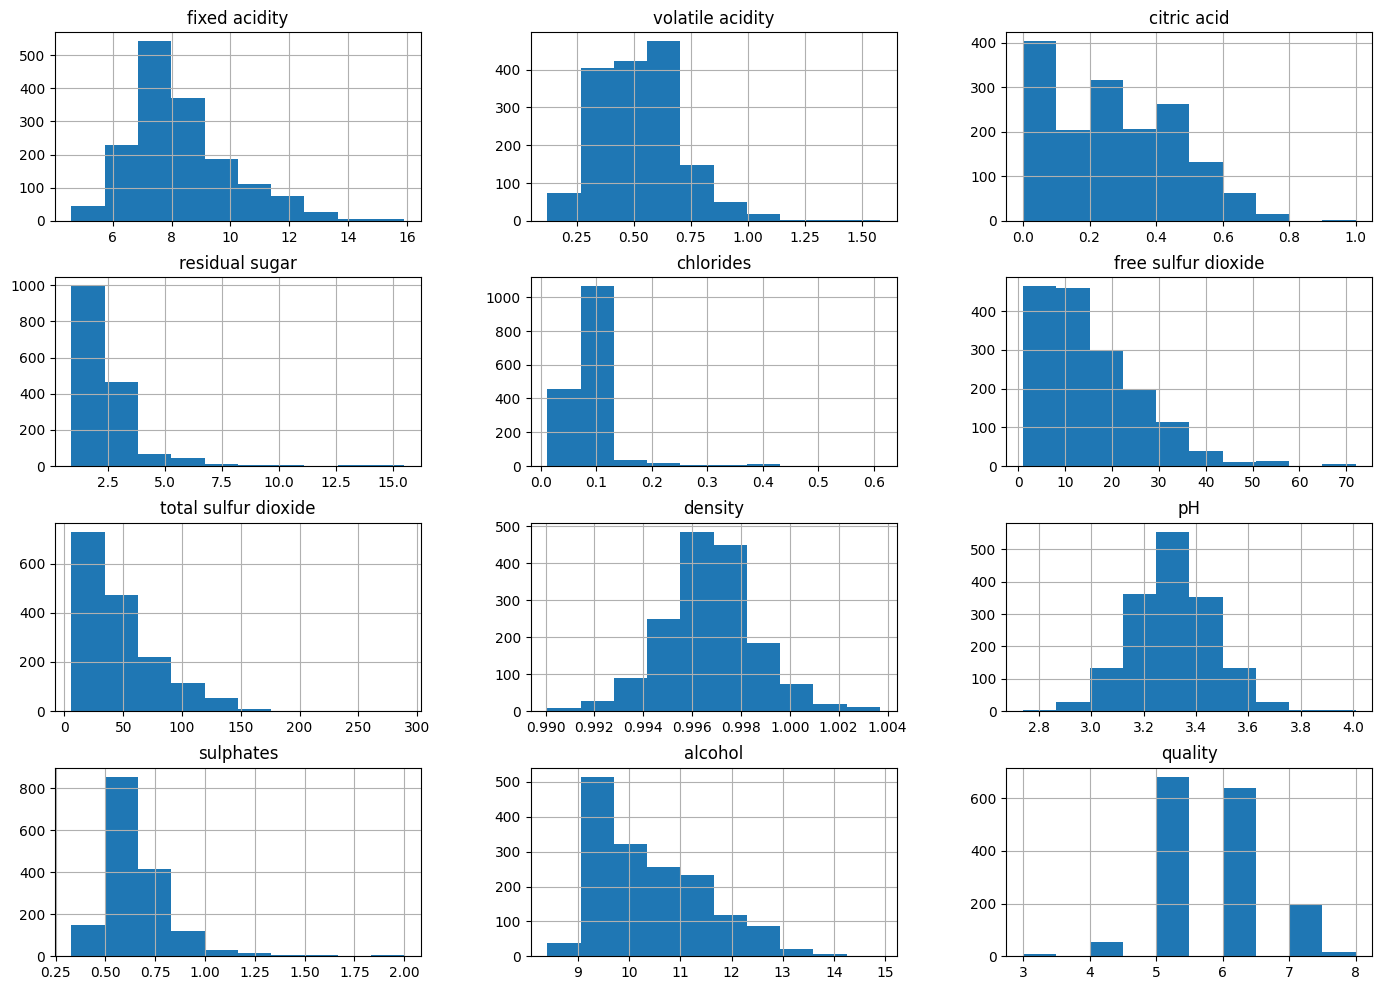

In [ ]:
df.hist(figsize=(17,12))
plt.show()

PLotting Box Plots

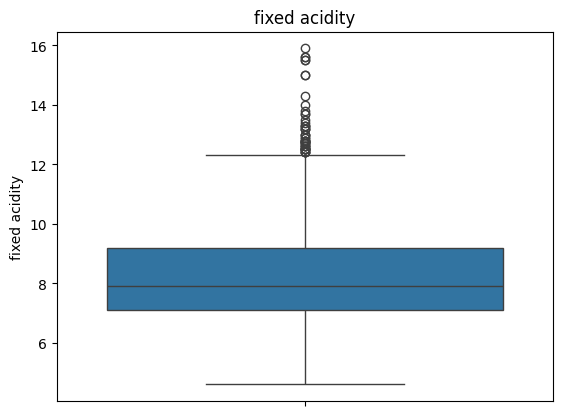

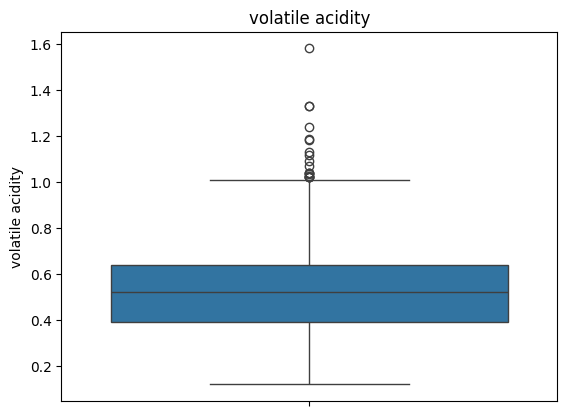

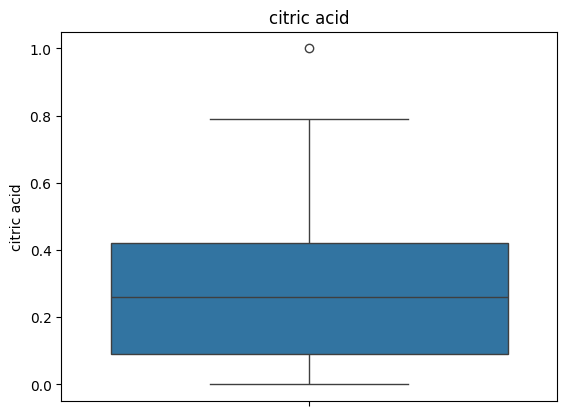

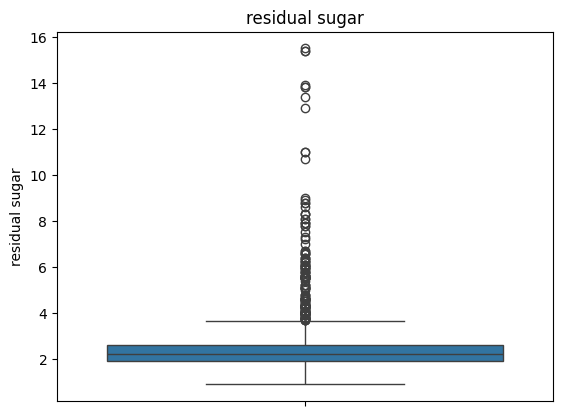

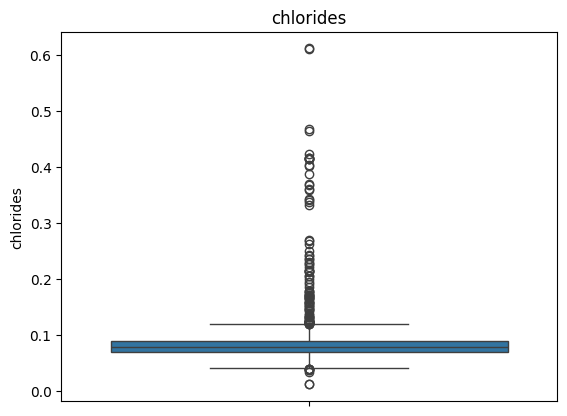

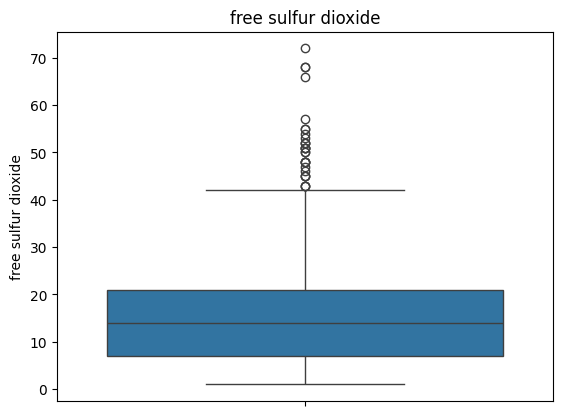

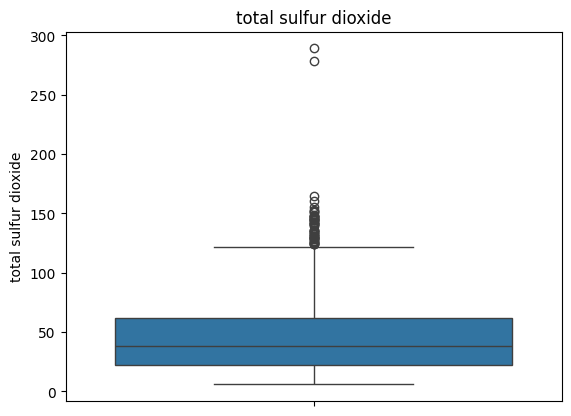

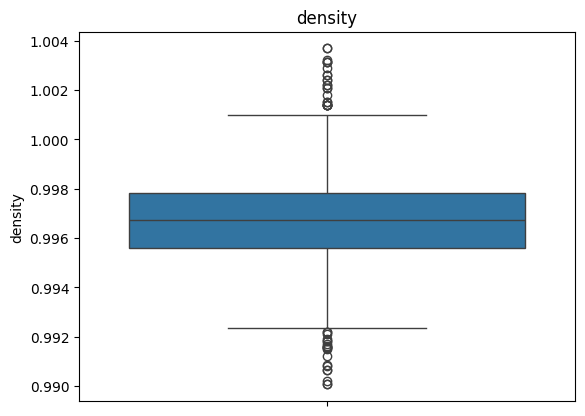

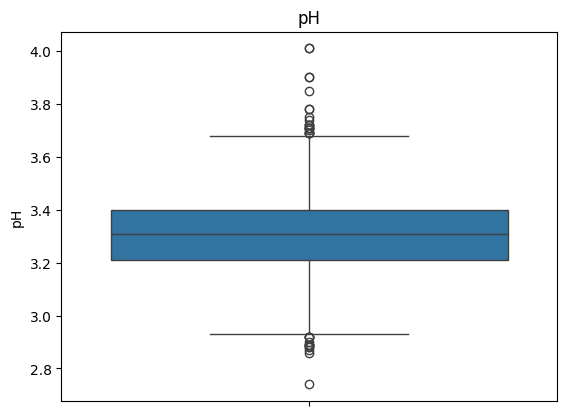

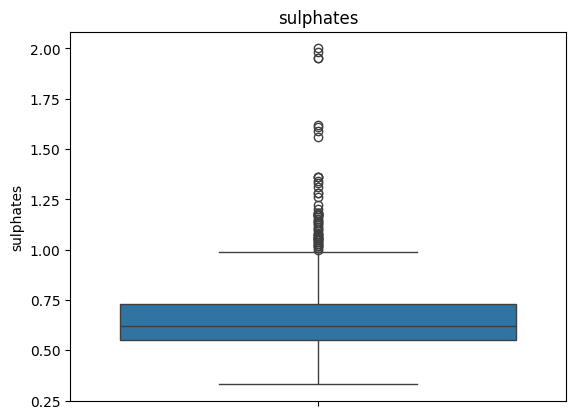

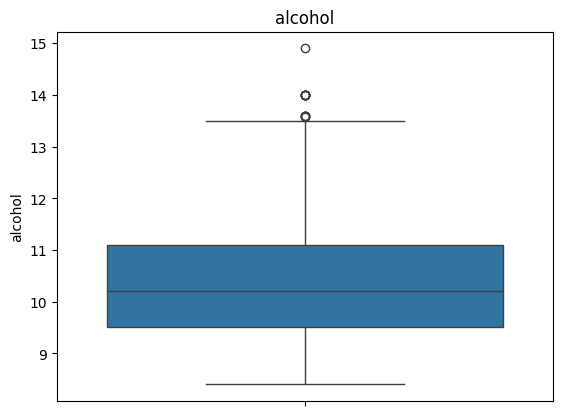

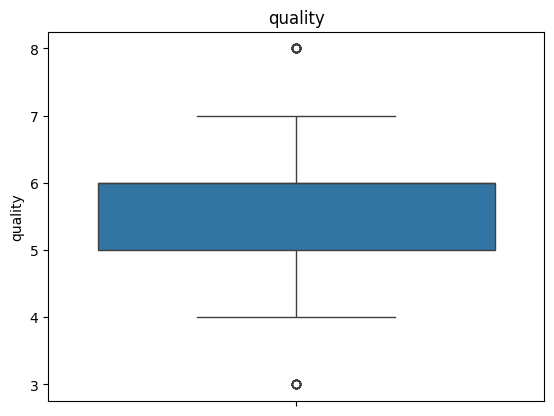

In [ ]:
for col in cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(col)

Plotting scatter plots

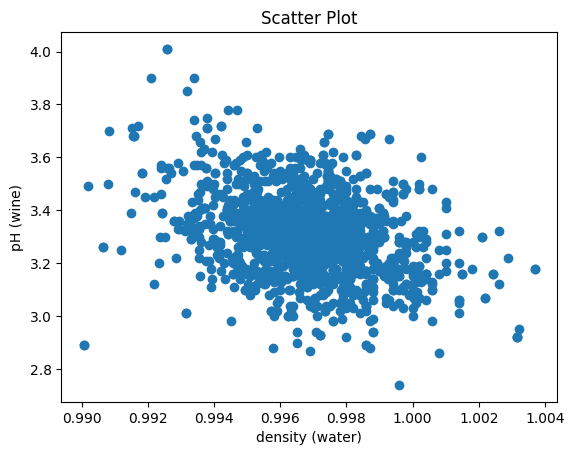

In [ ]:
d = df["density"]
ph = df["pH"]

plt.scatter(d, ph)
plt.title("Scatter Plot")
plt.xlabel("density (water)")
plt.ylabel("pH (wine)")
plt.show()

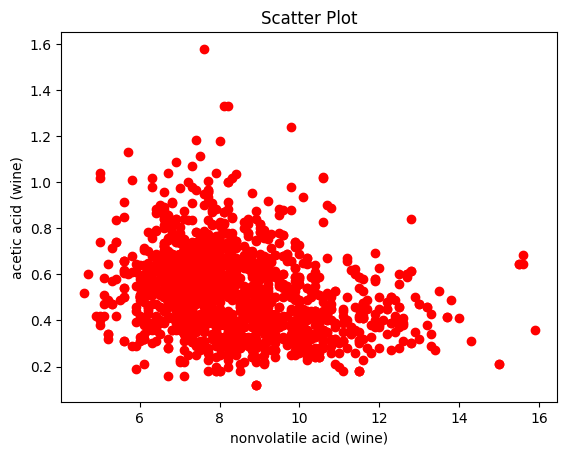

In [ ]:
fa = df["fixed acidity"]
va = df["volatile acidity"]

plt.scatter(fa, va,color = 'red')
plt.title("Scatter Plot")
plt.xlabel("nonvolatile acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()

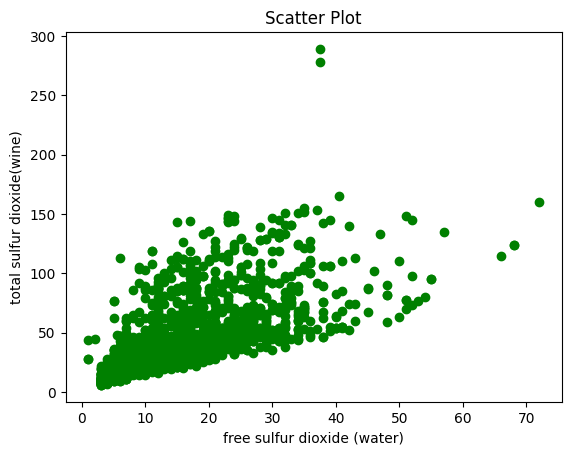

In [ ]:
fsd = df["free sulfur dioxide"]
tsd = df["total sulfur dioxide"]

plt.scatter(fsd, tsd,color = 'green')
plt.title("Scatter Plot")
plt.xlabel("free sulfur dioxide (water)")
plt.ylabel("total sulfur dioxide(wine)")
plt.show()

<Axes: >

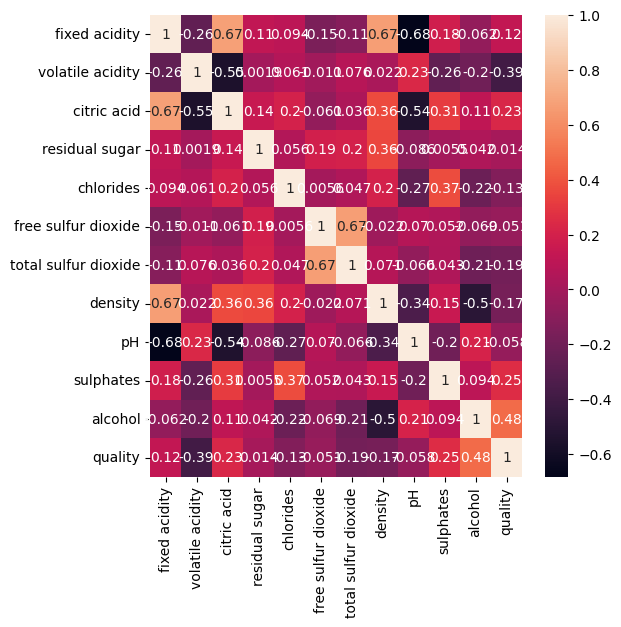

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.pairplot(df,hue='quality')

Output hidden; open in https://colab.research.google.com to view.

Let us see the range of quality of wive

In [ ]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

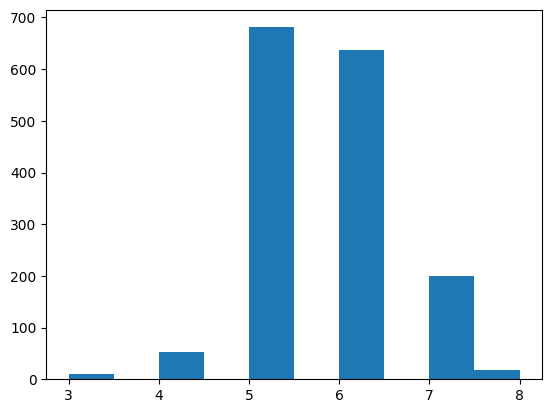

In [ ]:
plt.hist(df['quality'])

#### Data Preprocessing

In [ ]:
cols= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

x = df[cols] ## independent var
y = df['quality']  ## dependent var

Splitting the data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20 , random_state=42,shuffle=True)

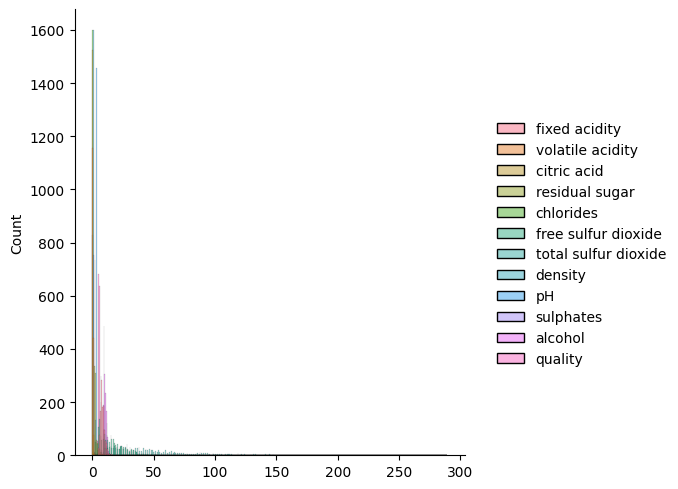

In [ ]:
sns.displot(df)

Scaling the data using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss= StandardScaler()

In [ ]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

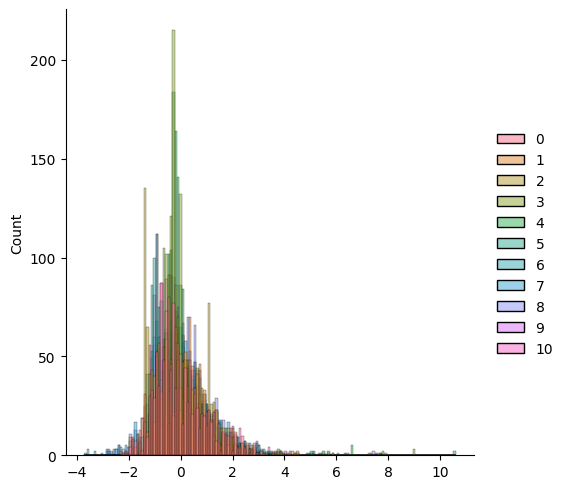

In [ ]:
sns.displot(x_train)

In [ ]:
x_test.shape

(320, 11)

### Method 1 :
### Prediction usign K Nearest Neighbour algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
pred=knn.predict(x_test)
pred

array([5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 6, 7, 5, 5, 7, 5, 4, 5,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5,
       6, 6, 7, 6, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 7, 5,
       6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       7, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6,
       6, 5, 5, 5, 5, 7, 6, 7, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 5, 6, 5, 6,
       5, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 7, 5, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 7, 6, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 7, 6, 5, 7,
       6, 7, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 7, 6, 7, 6,

In [ ]:
y_test

,quality
803,6
124,5
350,6
682,5
1326,6
...,...
1259,6
1295,5
1155,5
963,6


In [ ]:
matrix = confusion_matrix(y_test,pred)
matrix

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  5,  5,  0,  0],
       [ 0,  1, 89, 40,  0,  0],
       [ 0,  0, 39, 82, 11,  0],
       [ 0,  0,  3, 22, 17,  0],
       [ 0,  0,  0,  3,  2,  0]])

Let us find out the accuracy

In [ ]:
print('Accuracy using KNN is : ',100*accuracy_score(y_test,pred))

Accuracy using KNN is :  58.75


### Method 2 :
### Prediction using SVM Classifier

In this we will classify if the wine is good or bad so we will create a column which will state that if a wine quality is greater than 5 then it is a good quality wine else it is not

In [ ]:
y=df['quality']>5
y  ## dependent var

,quality
0,False
1,False
2,False
3,True
4,False
...,...
1594,False
1595,True
1596,True
1597,False


In [ ]:
y.value_counts()

,count
quality,
True,855
False,744


In [ ]:
x=df.iloc[:,:-1]

x   ## independent var

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25) ##splitting the data

In [ ]:
scaled_x_train=ss.fit_transform(x_train)

scaled_x_train

array([[ 0.03570115,  1.17013908, -0.82797173, ..., -0.77068411,
         0.91195248, -0.75660071],
       [-0.42519441, -0.54734879,  0.09751438, ...,  0.59078753,
        -0.10608706, -0.85048089],
       [ 0.03570115,  0.16145573, -1.18788299, ..., -0.57618817,
        -1.2372421 , -0.75660071],
       ...,
       [-0.25235857,  0.21597915,  0.20034617, ..., -0.12236428,
         0.1767017 , -0.85048089],
       [ 2.68585058, -0.32925509,  1.12583228, ..., -0.0575323 ,
         0.12014395,  2.15368509],
       [ 0.84226836,  2.45143956,  0.25176207, ..., -0.38169222,
        -1.01101109, -0.94436108]])

In [ ]:
scaled_x_test=ss.transform(x_test)

scaled_x_test

array([[ 1.41838781, -0.32925509,  0.81733691, ..., -0.90034808,
         0.57260597,  0.36996154],
       [-0.13713469,  1.57906477, -1.39354657, ...,  0.3314596 ,
        -0.72822233, -0.75660071],
       [ 0.43898476, -1.31067673,  0.30317796, ..., -0.31686023,
         1.02506798,  1.21488322],
       ...,
       [-0.59803024, -0.90175105,  1.12583228, ...,  0.3314596 ,
         0.68572147,  0.55772191],
       [ 4.18376113,  0.84299854,  2.51406145, ..., -2.3266517 ,
         0.12014395,  0.74548229],
       [-0.42519441, -0.54734879,  0.09751438, ...,  0.59078753,
        -0.10608706, -0.85048089]])

In [ ]:
x_test.shape

(400, 11)

Performing Classification

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC(C=1.0,
              kernel='rbf',
              degree=3,
              gamma='auto',
              probability=False,
              tol=0.001, cache_size=200,
              verbose=False, max_iter=-1,
              decision_function_shape='ovr',
              random_state=None)

svc_clf.fit(scaled_x_train,y_train)

SVC(gamma='auto')

In [ ]:
pred1=svc_clf.predict(scaled_x_test)

Checing Accuracy

In [ ]:
print(confusion_matrix(y_test,pred1))

[[130  55]
 [ 45 170]]


In [ ]:
print("Accuracy using SVM is : ",100*accuracy_score(y_test,pred1))

Accuracy using SVM is :  75.0


Plotting a confusion matrix

In [ ]:
matrix= confusion_matrix(y_test,pred1)

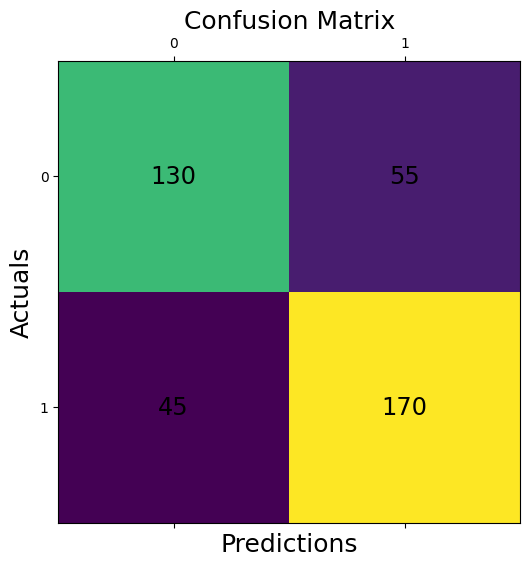

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(matrix )
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Define parameter grids for each model
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', verbose=2)
rf_grid_search.fit(scaled_x_train, y_train)


# Get the best models and evaluate them
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
y_pred_rf = rf_grid_search.best_estimator_.predict(scaled_x_test)
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, min_s

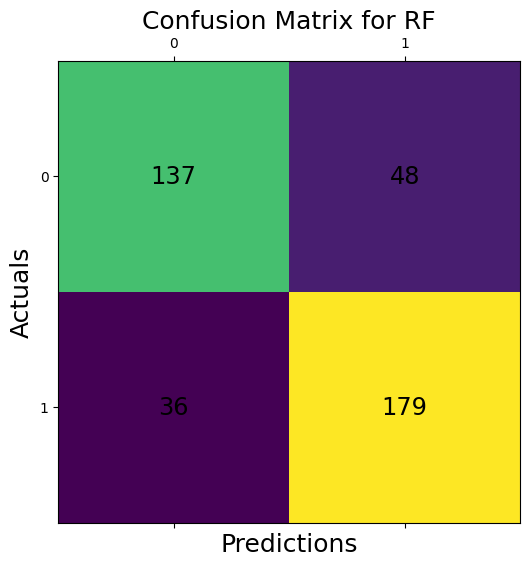

In [ ]:
matrix= confusion_matrix(y_test,y_pred_rf)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(matrix )
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for RF', fontsize=18)
plt.show()

In [ ]:
# Perform Grid Search for KNN
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy', verbose=2)
knn_grid_search.fit(scaled_x_train, y_train)

print("Best KNN Parameters:", knn_grid_search.best_params_)
y_pred_knn = knn_grid_search.best_estimator_.predict(scaled_x_test)
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, wei

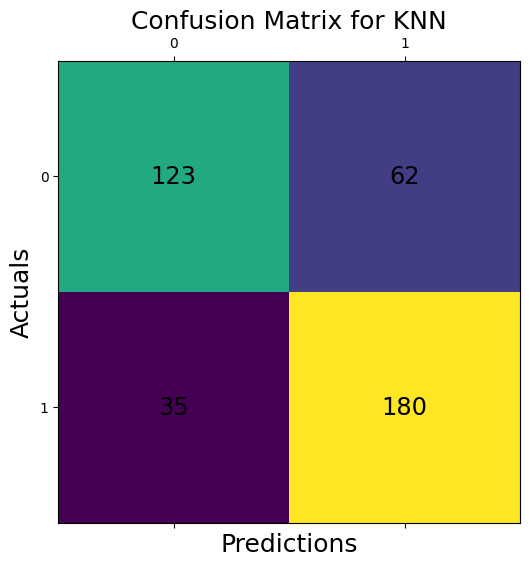

In [ ]:
matrix= confusion_matrix(y_test,y_pred_knn)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(matrix )
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for KNN', fontsize=18)
plt.show()